# ADP 실기 27회 머신러닝
## 신용카드 이상탐지 데이터 : 차원축소, 오버/언더샘플링, 이상탐지
- 캐글 데이터에서 일부 정제한 데이터가 사용
- 해당 데이터에서 V1~V17 컬럼만 사용(총 컬럼 20개), 약 1,193건의 데이터
    - 사용자 ID 및 민감한 기능(v1-v28)을 보호하기 위해 변환된 정보 

- Time : 트랜잭션 시간, 의미 없음  
- Amount : 신용카드 사용 금액
- Class : 0은 정상, 1은 사기

- 1.1) EDA 데이터 탐색
- 1-2) 변수간 상관관계를 시각화하고 전처리가 필요함을 설명하라
<br/>

- 2-1) 차원축소 방법 2가지 이상 비교하고 한가지 선택 (종류와 장/단점)
- 2-2) 추천한 한 가지를 실제로 수행하고 선택한 이유 설명
<br/>

- 3-1) 오버샘플링과 언더샘플링 장단점 비교 및 선택 구현
- 3-2) 구현 및 알고리즘 2가지 이상 비교, 성능 측정
- 3-3) 현재까지 전처리한 데이터를 통해 모델 수행 후 결과 분석
<br/>

- 4-1) 이상탐지 모델 2가지 이상 기술, 장/단점 설명
- 4-2) 2번에서 만든 데이터로 한 가지 이상탐지 모델을 구현하고, 3번에서 만든 모델과 비교
- 4-3) 데이터분석과 관점에서 3번에서 만든 모델과 4번에서 만든 모델 설명

In [24]:
# 일단 얘부터 입력 후 시작

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 메세지 숨기기
import warnings
warnings.filterwarnings("ignore")

## 1-1) EDA 및 데이터 탐색

In [25]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/problem1.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
0,60.0,1.069141,0.043786,0.309867,1.316694,-0.462394,-0.857888,0.207904,-0.191270,0.056398,0.041567,-0.507358,-0.108666,-0.473257,0.452046,1.005675,0.185441,-0.439976,89.40,0
1,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,0.00,1
2,426.0,-1.932055,1.724618,1.288229,-0.396998,-0.140202,2.470521,-1.865298,-5.186855,0.794764,0.155379,0.034517,0.906738,-0.027172,-0.404303,-0.473949,0.274034,-0.222340,16.19,0
3,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,529.00,1
4,674.0,-0.719065,0.638954,0.686335,-0.023240,2.317890,3.871978,-0.312797,1.089780,-0.596925,-0.006142,-0.242883,-0.384491,0.109079,0.187565,1.823472,0.274346,-0.697730,22.00,0


In [26]:
df.shape

(1193, 20)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1193 non-null   float64
 1   V1      1193 non-null   float64
 2   V2      1193 non-null   float64
 3   V3      1193 non-null   float64
 4   V4      1193 non-null   float64
 5   V5      1193 non-null   float64
 6   V6      1193 non-null   float64
 7   V7      1193 non-null   float64
 8   V8      1193 non-null   float64
 9   V9      1193 non-null   float64
 10  V10     1193 non-null   float64
 11  V11     1193 non-null   float64
 12  V12     1193 non-null   float64
 13  V13     1193 non-null   float64
 14  V14     1193 non-null   float64
 15  V15     1193 non-null   float64
 16  V16     1193 non-null   float64
 17  V17     1193 non-null   float64
 18  Amount  1193 non-null   float64
 19  Class   1193 non-null   int64  
dtypes: float64(19), int64(1)
memory usage: 186.5 KB


In [28]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
count,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.00000,1193.000000
mean,91514.485331,-0.755027,0.543730,-1.148224,0.777816,-0.409181,-0.283953,-0.852545,0.145026,-0.446390,-0.904275,0.656342,-1.014185,0.011973,-1.168346,0.019232,-0.629529,-1.070657,88.88570,0.167645
std,47896.081947,3.622262,2.663928,3.908787,2.345566,2.702077,1.507579,3.396565,2.471559,1.664075,2.902608,1.957200,2.996734,1.013383,3.230613,0.908008,2.269400,3.812768,220.14133,0.373707
min,60.000000,-30.552380,-33.644637,-31.103685,-4.294888,-22.105532,-10.886820,-37.060311,-37.353443,-11.126624,-23.228255,-2.651584,-17.228662,-2.800154,-18.493773,-4.498945,-14.129855,-25.162799,0.00000,0.000000
25%,50265.000000,-1.302600,-0.435358,-1.609339,-0.610310,-0.842184,-1.017863,-0.806043,-0.219328,-1.039740,-0.883807,-0.601391,-0.967306,-0.692559,-0.950226,-0.549590,-0.701499,-0.682272,3.54000,0.000000
50%,81797.000000,-0.302521,0.231973,-0.234204,0.327567,-0.073622,-0.379633,-0.084983,0.073036,-0.210455,-0.226471,0.283080,-0.014046,0.023014,-0.099055,0.046894,-0.055831,-0.152578,20.99000,0.000000
75%,136995.000000,1.249960,1.112040,0.811507,1.335332,0.684224,0.302350,0.464553,0.454794,0.452561,0.287274,1.212163,0.512121,0.699744,0.419194,0.660619,0.458139,0.368286,77.49000,0.000000
max,172676.000000,2.320621,19.167239,3.324665,12.114672,15.275762,6.268481,8.123589,20.007208,5.916809,7.135948,11.669205,3.106650,3.068228,3.886382,2.869424,3.139656,6.739384,3335.73000,1.000000


In [29]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
Amount    0
Class     0
dtype: int64

### 종속변수 불균형 수, 불균형 비율 확인

In [30]:
print(df['Class'].value_counts(), "\n")
# print(df['Class'].value_counts() / df['Class'].shape[0] * 100) # 비율

0    993
1    200
Name: Class, dtype: int64 



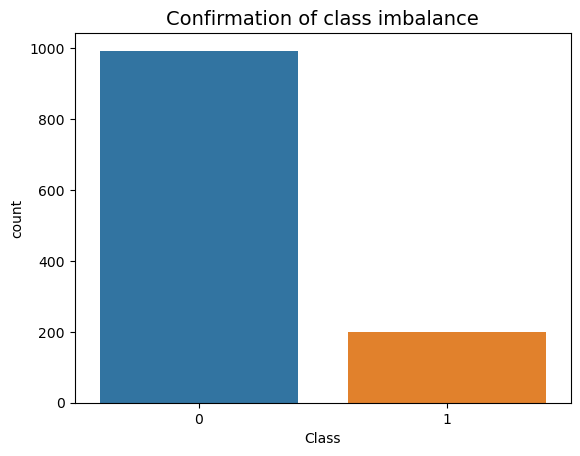

0 비율: 83.24%
1 비율: 16.76%


In [31]:
# 불균형 수치 확인 및 시각화

sns.countplot(x='Class', data = df)

plt.title('Confirmation of class imbalance', fontsize =14)
plt.show()

ratio_0 = round(len(df[df['Class']==0])/len(df)*100, 2)
ratio_1 = round(len(df[df['Class']==1])/len(df)*100, 2)
print('0 비율: {}%'.format(ratio_0))
print('1 비율: {}%'.format(ratio_1))

In [32]:
# 이상 거래 유무에 따라 그룹화 후, 건수와 평균값 도출

class_grp_count = df.drop("Time", axis=1).groupby("Class").count()
class_grp_mean = df.drop("Time", axis=1).groupby("Class").mean()
display(class_grp_count)
display(class_grp_mean)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount
Class,,,,,,,,,,,,,,,,,,
0,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993
1,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount
Class,,,,,,,,,,,,,,,,,,
0,0.018917,-0.011237,-0.045308,0.044207,0.086018,-0.045132,0.009048,-0.014774,-0.032517,0.005167,0.038878,0.003587,0.023074,0.024501,0.017683,0.043565,0.035805,85.187613
1,-4.597659,3.299139,-6.624207,4.420185,-2.867841,-1.469696,-5.130353,0.938431,-2.501269,-5.419653,3.722054,-6.067424,-0.043141,-7.090834,0.026921,-3.971442,-6.564245,107.246700


### 연속형 변수 스케일링
- 주성분 분석(PCA)이나 클러스터링과 같은 알고리즘을 사용하여 변수들을 시각화할 때, 스케일링을 진행하면 결과가 더욱 해석 가능하고 안정적
#### PCA를 수행하기 전, 변수 간 스케일의 차이가 주성분 선정에 영향을 주는 것을 방지하기 위해 스케일링 진행
#### 스케일링 하지 않으면, 값이 큰 feature가 더 중요한 feature로 판단될 수 있음)

In [33]:
# 피쳐와 종속변수 할당
X = df.drop(['Class'], axis=1)
y = df['Class']

display(X.head(3))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount
0,60.0,1.069141,0.043786,0.309867,1.316694,-0.462394,-0.857888,0.207904,-0.191270,0.056398,0.041567,-0.507358,-0.108666,-0.473257,0.452046,1.005675,0.185441,-0.439976,89.40
1,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,0.00
2,426.0,-1.932055,1.724618,1.288229,-0.396998,-0.140202,2.470521,-1.865298,-5.186855,0.794764,0.155379,0.034517,0.906738,-0.027172,-0.404303,-0.473949,0.274034,-0.222340,16.19


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(df_scaled, columns=X.columns)
df_scaled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount
0,-1.910236,0.503810,-0.187750,0.373186,0.229840,-0.019702,-0.380859,0.312343,-0.136123,0.302269,0.325996,-0.594823,0.302295,-0.479024,0.501785,1.086837,0.359263,0.165482,0.002337
1,-1.903009,-0.430077,0.528863,-0.118149,1.373417,-0.041840,-0.758217,-0.496251,0.504602,-1.396977,-0.643828,1.301226,-0.629523,-0.599428,-0.966447,0.408199,-0.225360,-0.461643,-0.403936
2,-1.902592,-0.325079,0.443474,0.623589,-0.501076,0.099587,1.827850,-0.298295,-2.158200,0.746165,0.365223,-0.317845,0.641274,-0.038644,0.236600,-0.543375,0.398318,0.222587,-0.330361
3,-1.901631,-0.632056,-1.389898,0.572460,0.644391,0.654951,-0.518180,0.347001,-0.086144,0.105471,0.022640,-0.547398,0.170605,0.656027,-0.162168,2.183059,0.571452,0.438284,2.000074
4,-1.897412,0.009932,0.035761,0.469539,-0.341662,1.009673,2.757848,0.158976,0.382410,-0.090500,0.309553,-0.459637,0.210215,0.095864,0.419883,1.987865,0.398455,0.097851,-0.303958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,1.686680,0.727802,-0.386473,0.318436,-0.129882,-0.321536,-0.583829,0.094795,-0.134832,1.074512,0.228055,-0.351935,0.735515,0.756261,0.260300,0.366076,0.183432,0.234518,-0.244880
1189,1.687140,0.788667,-0.209684,-0.116169,-0.253130,0.293382,-0.321460,0.312203,-0.179756,0.619866,0.312722,-0.829227,0.413767,0.259645,0.494449,0.852673,0.231283,0.111134,-0.383531
1190,1.687996,0.782593,-0.624721,0.207292,-0.642252,-0.341105,-0.256006,-0.063678,-0.109518,0.383376,0.555018,-0.721309,0.241127,0.595274,0.165329,0.273872,0.783714,0.314287,-0.189347
1191,1.692383,-1.399860,-0.079089,0.106338,-0.003284,-1.250189,1.598370,-0.418330,1.113601,0.600659,0.695315,-1.130171,0.733527,0.271615,0.354390,-2.004647,-0.177623,0.536800,0.277730


### EDA 결과
- 결측치 확인 결과, 결측치는 존재하지 않았다.
- 타겟변수가 되는 'Class' 변수는 정수 값으로 0,1을 가지고, 이외의 변수들은 모두 실수형 자료형을 가졌다.

- 정상거래(0)와 비정상거래(1)의 수가 약 83:17의 비율로 상당히 imbalanced 된 것을 확인 할 수 있었다.
    - 이는 이상탐지 데이터이기 때문에 'fraud'인 '숫자 1 calss'가 적은 것으로 보여진다.
- 그룹화 한 건수와 평균값을 살펴봤을 때 정상거래(0)에 비해, 비정상 거래(1)에서 더 큰 금액(Amount)이 사용되는 것을 확인할 수 있었다.
- Time, Amount 변수는 다른 수치형 변수들과 mean, max, min 등 차이가 크게 나서 스케일링이 필요하다고 판단하여, 스케일링을 진행했다.

## 1-2) 변수간 상관관계를 시각화하고 전처리가 필요함을 설명하라

<AxesSubplot:>

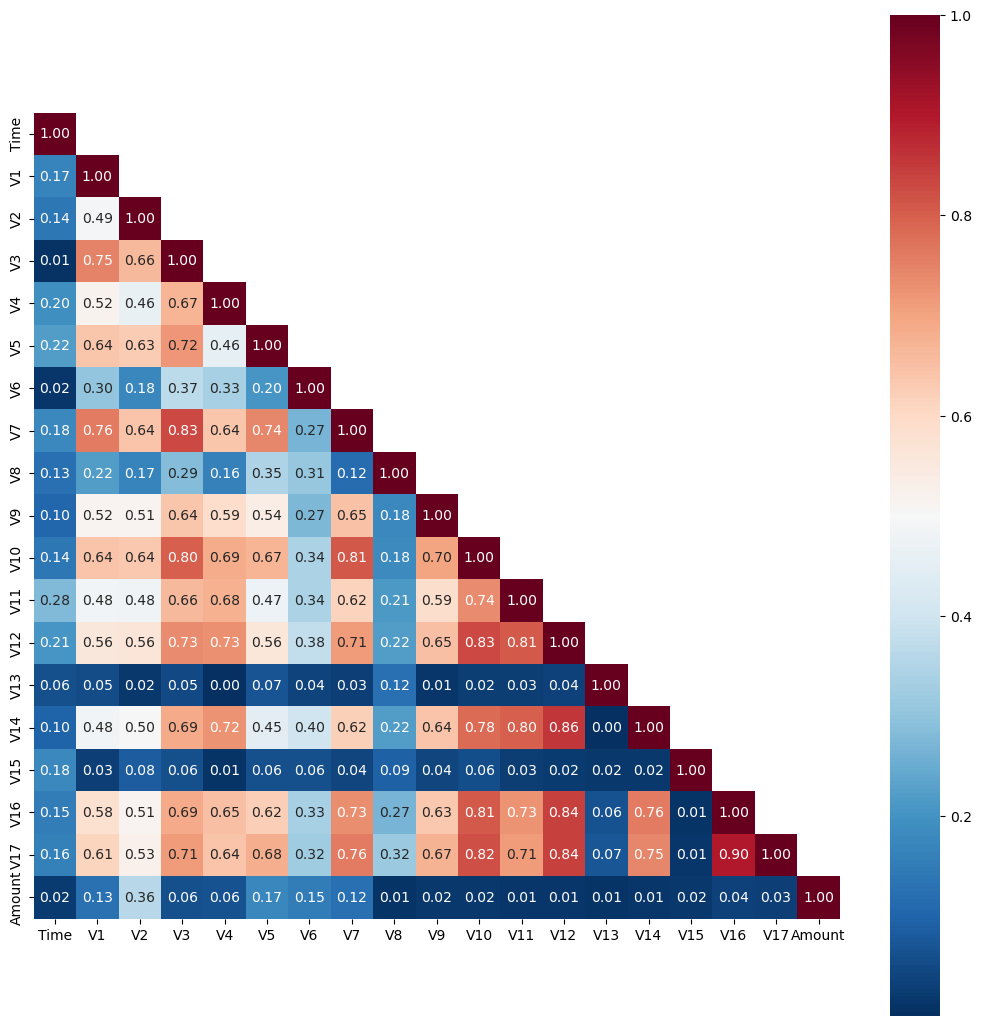

In [35]:
# 상관관계 시각화 : 히트맵
plt.figure(figsize=(13, 13))

# corr matrix 생성
corr_matrix = df.drop(['Class'], axis=1).corr().abs() # .abs() 절댓값 기준

# 상삼각행렬 반환
up_mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_)

sns.heatmap(corr_matrix, mask=up_mask, annot=True, 
            fmt='.2f', square=True, cmap='RdBu_r')

In [37]:
# corr 값이 큰 피처 관계들을 출력
corr_unstack = corr_matrix.unstack()
# 상관 계수가 1보다 작은 값들을 추출하여 내림차순으로 정렬, 상위 23개의 값을 가지는 corr 칼럼명 반환
df_cor = pd.DataFrame(corr_unstack[corr_unstack < 1].sort_values(ascending=False), 
                      columns=['corr'])[:23]
display(df_cor.style.background_gradient(cmap="RdBu_r")) # 색상 그라데이션 적용

# 상위 피처 컬럼명
# unique() 메서드를 사용하여 중복된 값을 제거
top_corr_cols = df_cor.reset_index()['level_0'].unique()
print('top_corr_cols:', top_corr_cols)

,,corr
V17,V16,0.902381
V16,V17,0.902381
V12,V14,0.855828
V14,V12,0.855828
V12,V16,0.843644
V16,V12,0.843644
V12,V17,0.840627
V17,V12,0.840627
V3,V7,0.830995
V7,V3,0.830995


top_corr_cols: ['V17' 'V16' 'V12' 'V14' 'V3' 'V7' 'V10' 'V11']


### 차원축소 필요성
- 변수들의 상관관계가 높으면 다중공선성이 발생할 가능성이 높아진다.따라서 다중공선성을 해결하기 위해 변수들을 처리하는 것이 필요하다.
- 또한 변수가 많아 차원이 높다. 그러므로 상관관계가 높은 변수들을 차원축소한 후, 새로운 종합변수를 생성하는 것이 모델 성능 향상에 기여할 수 있을 것이라 생각한다.
- 원래는 전처리 시, 다중공선성 방지를 위해 상관관계가 높은 변수들을 처리해야한다. 하지만 본 데이터는 컬럼이 무엇을 나타내는지 추정할 수 없어 변수를 어떻게 처리해야할지 결정하는 것이 어렵고, 컬럼 수가 많기 때문에 이런 상관성을 확인 후 차원축소 등의 방법을 사용해야 한다.


## 2-1) 차원축소 방법 2가지 이상 비교하고 한가지 선택 (종류와 장/단점)
### 1) PCA(주성분분석)
- PCA는 변수 간 상관관계에 기반하여 데이터의 차원을 축소하는 방법
- 장점 
    - 기존 데이터의 정보 유실 최소화, 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명 가능
- 단점
    - 비선형적인 구조를 가진 데이터에서는 충분한 정보를 추출할 수 없고 해석이 어려울 수 있음

### 2) LDA(선형판별분석)
- 특정 공간 상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산과 클래스 내 분산의 비율을 최대화하는 방식을 차원을 축소하는 방법
- 장점
    - 클래스를 구분하기 위한 축을 찾아내므로, 분류 문제에서 유용하게 사용
    - 데이터가 정규분포를 따르고, class가 동일한 공분산 행렬을 가지면 PCA보다 더 좋은 성능을 낼 수 있음
- 단점
    - 입력 데이터의 분포와 밀접한 관련이 있기 때문에, 데이터의 분포가 클래스 간 분산과 클래스 내 분산을 적절하게 반영하지 않는 경우에는 성능이 저하될 수 있음
    - 공분산 구조가 서로 다른 경우 사용할 수가 없음
    
### 3) t-SNE
- 방법 : t-분포를 이용해 하나의 기준점을 정하고 모든 다른 데이터와 거리를 구한 후, 그 값에 해당하는 t 분포 값을 선택하여 값이 유사한 데이터끼리 묶어줌
- 장점 : PCA와 달리, Local neighbor structure를 보존(고차원의 벡터의 유사성이 저차원에서도 유사하도록 보존)
- 단점 : 데이터의 개수가 n개라면 연산량은 n의 제곱만큼 늘어남, 매번 계산할 때마다 축의 위치가 바뀌므로, 매번 값이 바뀌기 때문에 모델의 학습 feature로 사용 되기에는 다소 어려움

## 2-2) 추천한 한 가지를 실제로 수행하고 선택한 이유 설명

### PCA 선택
- t-SNE는 연산량이 많고, PCA는 고차원 데이터를 저차원으로 변환하는 데 효과적이고 계산 비용이 적게 든다.
- LDA의 새로운 좌표축의 개수는 입력 데이터의 클래스 수(이진 분류에서는 2)보다 작다. 
    - 따라서 LDA을 통해 차원을 1개로 줄이면 손실되는 데이터가 너무 많아진다.
- 따라서 데이터 손실률이 가장 적고, 분류모델 전처리에 널리 쓰이는 PCA를 선정하여 수행한다.

In [50]:
# PCA 수행
pca = PCA(n_components=10)
data_pca_X = pca.fit_transform(df_scaled)

In [51]:
pca_result = pd.DataFrame({'설명가능한 분산 비율(고윳값)': pca.explained_variance_,
                           '기여율': pca.explained_variance_ratio_},
                           index = np.array([f'pca{num + 1}' for num in range(10)])
                          )
pca_result['누적기여율'] = pca_result['기여율'].cumsum()
pca_result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,9.290528,0.488565,0.488565
pca2,1.307902,0.068779,0.557345
pca3,1.281768,0.067405,0.624749
pca4,1.154049,0.060688,0.685438
pca5,1.121474,0.058975,0.744413
pca6,0.945748,0.049735,0.794148
pca7,0.796343,0.041878,0.836026
pca8,0.667092,0.035081,0.871106
pca9,0.460198,0.024201,0.895307
pca10,0.431816,0.022708,0.918015


<Figure size 700x400 with 0 Axes>

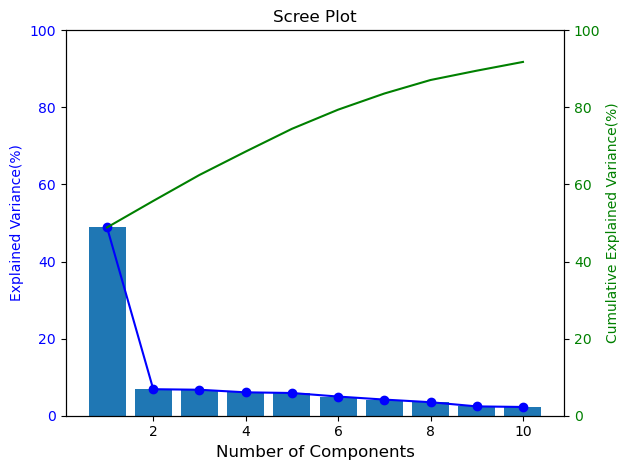

In [52]:
plt.figure(figsize=(7,4))

# left side
fig, ax1 = plt.subplots()
ax1.set_title('Scree Plot', fontsize=12)
ax1.set_xlabel('Number of Components', fontsize=12)
ax1.set_ylabel('Explained Variance(%)', color='b', fontsize=10)
ax1.bar(range(1,11,1), pca_result['기여율']*100)
ax1.plot(range(1,11,1), pca_result['기여율']*100, 'b-o')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_ylim(0, 100)

# right side with different scale
ax2 = ax1.twinx()
ax2.set_ylabel('Cumulative Explained Variance(%)', color='g', fontsize=10)
ax2.plot(range(1,11,1), pca_result['누적기여율']*100, 'g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.set_ylim(0, 100)

fig.tight_layout()
plt.show()

### 7개의 주성분으로 PCA 진행
- Scree Plot을 통해, 고유값 변화율이 완만해지는 부분인 3개의 주성분이 적절해 보일 수 있으나 분산 설명력이 너무 적어 모델 성능에 부정적인 영향을 끼칠 수 있다.
    - 누적 기여율 : 주성분 분석에서 각 주성분이 설명하는 분산의 비율을 누적하여 계산
    - 누적된 분산 설명이 0.7 ~ 0.9 일 때 주성분의 개수가 적절하다고 판단할 수 있다. 
- 따라서 분산의 설명력이 80% 이상인 7개의 주성분으로 차원축소하는 게 적절하다고 판단하였다. 19개의 변수에서 7개의 변수로 축소시켰으므로 차원축소 관점에서 의미가 있다고 볼 수 있다.


---

In [ ]:
# # 다른 코드 이렇게도 구현하구나 참고

# # PCA 모델 생성
# pca = PCA() # 먼저 모든 주성분 추출

# # PCA 모델 fitting
# pca.fit(X_scaled)

# explained_variances = pca.explained_variance_ratio_
# cumulative_variances = np.cumsum(explained_variances)

# # 누적된 설명 분산이 70% 이상이 되는, 적절한 주성분 개수 찾기
# # 0.9 이상이면 12개가 가장 적절한 것으로 파악됨
# n_components_70 = np.argmax(cumulative_variances >= 0.7) + 1

# print("설명 분산:", explained_variances, "\n")
# print("누적된 설명 분산:", cumulative_variances, "\n") 
# print("누적 설명 분산 0.7 이상, 적절한 주성분 개수:", n_components_70)

# n_components_90 = np.argmax(cumulative_variances >= 0.9) + 1
# print("누적 설명 분산 0.9 이상, 적절한 주성분 개수:", n_components_90)

# plt.plot(cumulative_variances)
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.show()

## 3-1) 오버샘플링과 언더샘플링 장단점 비교 및 선택 구현

### 오버샘플링
- 적은 레이블을 가진 데이터 세트를 많은 레이블을 가진 데이터 세트 수준으로 증식하여 데이터 불균형을 극복하는 방식
- 불균형 데이터셋에서 분류 모델의 성능을 향상시키기 위한 오버 샘플링 방법을 이용

#### 1) Random Oversampling
- 기존에 존재하는 소수의 클래스를 단순 복제하여 클래스가 불균형하지 않도록 비율을 맞춰주는 방법
- 장점
    - 쉽게 구현할 수 있다.
    - 다른 오버샘플링 기법들과 비교해서 빠른 속도로 학습이 가능하다.
- 단점
    - 동일한 소수 클래스 데이터가 단순 복제되기 때문에, 과적합 문제가 발생할 수 있다.

#### 2) SMOTE

- 적은 데이터 세트에 있는 개별 데이터들의 K 최근접 이웃을 찾아서, 해당 데이터와 K개의 이웃들의 차이를 일정 값으로 만들어서 기존 데이터와 약간 차이가 나는 새로운 데이터들을 생성하는 방식
- 장점
    - 소수 클래스의 데이터를 단순히 복제하는 것이 아니라, 소수 클래스 데이터의 변형을 적용하므로 과적합 문제가 적음
- 단점
    - Resampling 방식보다 처리속도가 느릴 수 있다.
    - 고차원 데이터에는 문제가 발생할 수 있다.

### 언더 샘플링
- 많은 레이블을 가진 데이터 세트를 적은 레이블을 가진 데이터 세트 수준으로 감소
- 다수 클래스에 속하는 데이터의 관측치를 감소시켜, 소수 클래수 개수에 맞추는 방식
- 종류
    - 1) Random Undersampling : 다수 클래스에 속해 있는 관측치들 중 무작위로 샘플링하는 기법. 수행 마다 다른 결과 도출
    - 2) Tomek Links : 서로 다른 클래스의 두 점을 연결한 후 토멕링크에 해당하는 데이터 쌍들 중 다수 클래스의 데이터를 삭제

### 오버 샘플링 선택
- Class 값의 분포를 살펴봤을 때 정상 거래와 이상 거래의 비율이 약 83:17이었던 것을 확인할 수 있다.
- 언더샘플링할 경우 정상거래 데이터(class=0)가 약 1000개 가량 사라지기 때문에, 데이터 손실의 문제로 인해 예측 성능이 저하될 수 있다.
- 따라서, 오버샘플링이 분석에 더 적절할 것으로 파악하여 구현한다.

## 3-2) 구현 및 알고리즘 2가지 이상 비교, 성능 측정

## 3-3) 현재까지 전처리한 데이터를 통해 모델 수행 후 결과 분석

---

## 4-1) 이상탐지 모델 2가지 이상 기술, 장/단점 설명

## 4-2) 2번에서 만든 데이터로 한 가지 이상탐지 모델을 구현하고, 3번에서 만든 모델과 비교

## 4-3) 데이터분석과 관점에서 3번에서 만든 모델과 4번에서 만든 모델 설명